In [2]:
import pandas as pd
import os

current_directory = os.getcwd()
print(f"\nCurrent working directory: {current_directory}\n")

path_data = "Datasets\covid19-cough-audio-classification"
filename = os.path.join(path_data, "metadata_compiled.csv")

data = pd.read_csv(filename, encoding="latin-1")


Current working directory: c:\Users\Lenovo\Desktop\GeoCough\GeoCougher



In [3]:
data.head()

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Die Spalten des Datensatzes

In [4]:
data.columns

Index(['uuid', 'datetime', 'cough_detected', 'SNR', 'latitude', 'longitude',
       'age', 'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
       'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1',
       'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1',
       'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2',
       'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2',
       'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3',
       'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3',
       'quality_4', 'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4',
       'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

#### Count of non-null values
- alle Spalten unterhalb von 'Status' scheinen irrellevant

In [5]:
data.count()

uuid                     27550
datetime                 27550
cough_detected           27550
SNR                      27550
latitude                 16084
longitude                16084
age                      15218
gender                   16224
respiratory_condition    16224
fever_muscle_pain        16224
status                   16224
quality_1                  820
cough_type_1               802
dyspnea_1                  820
wheezing_1                 820
stridor_1                  820
choking_1                  820
congestion_1               820
nothing_1                  820
diagnosis_1                802
severity_1                 802
quality_2                  820
cough_type_2               801
dyspnea_2                  820
wheezing_2                 820
stridor_2                  820
choking_2                  820
congestion_2               820
nothing_2                  820
diagnosis_2                802
severity_2                 802
quality_3                  820
cough_ty

Hier entsteht der um die erwähnten Spalten gekürtzte Dataframe

In [6]:
data_cut = data[['uuid','datetime','cough_detected','SNR','latitude','longitude','age','gender','respiratory_condition','fever_muscle_pain','status']]

#### Structure of Dataset

In [7]:
data_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27550 entries, 0 to 27549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   27550 non-null  object 
 1   datetime               27550 non-null  object 
 2   cough_detected         27550 non-null  float64
 3   SNR                    27550 non-null  float64
 4   latitude               16084 non-null  float64
 5   longitude              16084 non-null  float64
 6   age                    15218 non-null  float64
 7   gender                 16224 non-null  object 
 8   respiratory_condition  16224 non-null  object 
 9   fever_muscle_pain      16224 non-null  object 
 10  status                 16224 non-null  object 
dtypes: float64(5), object(6)
memory usage: 2.3+ MB


#### Summary statistics für SNR, age, und cough_detected

In [8]:
data_cut[['cough_detected', 'SNR', 'age']].describe()

,cough_detected,SNR,age
count,27550.000000,2.755000e+04,15218.000000
mean,0.649544,inf,36.800611
std,0.387850,NaN,14.599737
min,0.000000,-4.718740e+00,1.000000
25%,0.208225,5.794974e+00,26.000000
50%,0.871300,1.212098e+01,35.000000
75%,0.986300,1.977735e+01,46.000000
max,1.000000,inf,102.000000


Für die SNR Werte gilt 
- Je höher der Wert, desto lauter ist das relevante Audiosignal im Verhältniss zu Hintergrundgeräuschen/ Rauschen
- Es gilt festzustellen, wo ein entsprechender Threshhold gesetzt werden müsste unterhalb derer, die Audiosamples für die Weiterverarbeitung ungeeignet sind
    - Evtl. lassen sich vorab gewisse Methoden zur Rauschunterdrückung auf die Audiosamples anwenden
- Problem: Unplausible Werte bei der Erfassung der grundliegenden statistischen Werte

#### Verteilung der Geschlechter und Altersgruppen

<Axes: ylabel='age'>

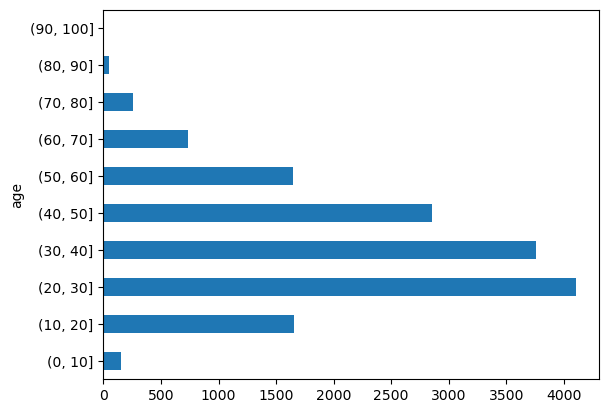

In [19]:
bins_age = [0,10,20,30,40,50,60,70,80,90,100]
altersgruppen = pd.cut(data_cut['age'], bins =bins_age)
altersgruppen.value_counts().sort_index().plot(kind ='barh')

<Axes: xlabel='gender'>

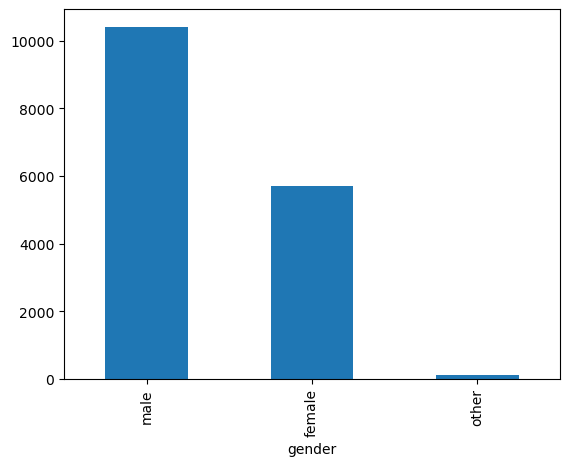

In [29]:
data_cut['gender'].value_counts().plot(kind= 'bar')